In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline

###  load the data 

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

#### sample img

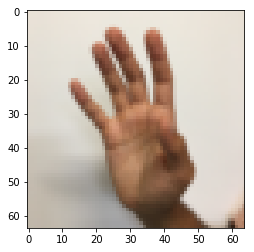

In [3]:
plt.imshow(X_train_orig[82,...])

#### look at shapes 

In [4]:
X_train_orig.shape , Y_train_orig.shape , Y_test_orig.shape , X_test_orig.shape, classes

((1080, 64, 64, 3),
 (1, 1080),
 (1, 120),
 (120, 64, 64, 3),
 array([0, 1, 2, 3, 4, 5]))

### create placeholders 

In [ ]:
def create_placeholders(nH0, nW0, nC0, ny):
    X = tf.placeholder(tf.float32, [None, nH0, nW0, nC0])
    Y = tf.placeholder(tf.float32, [None, ny])
    return X,Y

### initialize the parameters 

In [ ]:
def initialize_parameters():
    W1 = tf.get_variable("W1", [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

### forward prob

`CONV2D -> RELU -> MAXPOOL ->
CONV2D -> RELU -> MAXPOOL ->
FLATTEN -> FULLYCONNECTED`

In [ ]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME') # M 64 64 8 
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize=[1,8,8,1] ,strides=[1,8,8,1],padding="SAME") 
    
    Z2 = tf.nn.conv2d(P1,W2,strides=[1,1,1,1],padding='SAME')  
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize=[1,4,4,1] ,strides=[1,4,4,1],padding="SAME") 
    
    F = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(F,6,activation_fn=None) # linear AF
    
    print(Z1.shape)
    print(A1.shape)
    print(P1.shape)
    print(Z2.shape)
    print(A2.shape)
    print(P2.shape)
    
    print(F.shape)
    print(Z3.shape)
    
    return Z3

    
    
    

### compute cost 

In [ ]:
def compute_cost(Z3,Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))
    return cost 

### model 

In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.009,
          num_epochs=100, minibatch_size=64, print_cost=True):
#     CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    m,nH0,nW0,nC0 = X_train.shape
    ny = Y_train.shape[1]
    
    X,Y = create_placeholders(nH0,nW0,nC0,ny)
    
    parameters = initialize_parameters()    
    Z3 = forward_propagation(X,parameters)
    
    cost = compute_cost(Z3,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        epoch = 1000
        costs = [] 
        for i in range(epoch):
            a, _ = sess.run([cost,optimizer],feed_dict={X:X_train,Y:Y_train})
            costs.append(a)
    return costs

In [ ]:
y_train = convert_to_one_hot(Y_train_orig,6).T
y_test = convert_to_one_hot(Y_test_orig,6).T

x_test = X_test_orig/255
x_train = X_train_orig/255


In [ ]:
tf.reset_default_graph()
costs = model(x_train,y_train,x_test,y_test)

(?, 64, 64, 8)
(?, 64, 64, 8)
(?, 8, 8, 8)
(?, 8, 8, 16)
(?, 8, 8, 16)
(?, 2, 2, 16)
(?, 64)
(?, 6)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [ ]:
plt.plot(costs);

In [ ]:
max(costs), min(costs)

# bugs 

- max pooling layers outputs shapes 

## soul  

i miss understanded the `padding = "SAME"` arg work 

**see:**

`If padding == "SAME": output_spatial_shape[i] = ceil(input_spatial_shape[i] / strides[i])

`